In [1]:
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as clrs
import matplotlib.cm as cm
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re
import collections
import string
from collections import OrderedDict
import random
from collections import Counter
import statistics
num_regex = re.compile(r'\d+')
import os
import operator
import pandas as pd
import string

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## This notebook is used to plot the genotype distributions for some given runs (the pink and blue plots)

In [2]:
nRuns = 100
runID_offsets = [0, 100]
duration = 4368 #duration of sims in hours - equivalent to 26 weeks
dates = ["24-Sep-2020", "09-Oct-2020", "14-Oct-2020", "06-Nov-2020", "16-Nov-2020", "25-Nov-2020"] #dates the simulations were performed on
pc_res = [14, 15, 16] #percentages of the populations which are resistant to the applied biocide
phase2_str = "phase2"

#parameters for the log normal distributions used
#[scale, sigma]
log_norm_params_14pcRes = [2.703747953786337, 0.5690825284230452]
log_norm_params_15pcRes = [2.6133256846855746, 0.6260058161550592]
log_norm_params_16pcRes = [2.47772924764521, 0.7060073500033884]

In [3]:
def getFilepathToGenoRuns(date, pc_res, phase, suffix=""):
    '''
    creates a string with the file location of the genotype distributions (all the run_ID files)
    
    the suffix argument is used for any extra info in the filename
    '''
    
    return "geno_distb_data_"+phase+"/"+str(pc_res)+"_resistant-"+date+suffix


def getEventCountersDataframe(date, pc_res, phase, sigma, duration, suffix=""):
    
    df = pd.read_csv("geno_distb_data_"+phase+"/"+str(pc_res)+"_resistant-"+date+suffix+"/"+str(pc_res)+"_resistant-"+date+suffix+"-event_counters-sigma="+"{:.5f}".format(sigma)+"-t="+str(duration)+".0.csv")
    df['date'] = date
    return df


def getListOfMeasurementTimes(directory_name):
    '''
    for each runID directory, this gets the filenames and extracts a list of the times they were sampled at.
    directory_name is of form path_to_files/runID_<n>
    
    returns: sorted list of the time vals, in string form with 2 decimal places
    '''
    time_list = []
    def get_numbers_from_filename(filename):
        return re.search(r'(\d+(?:\.\d+)?)', filename).group(0)
    
    for filename in os.listdir(directory_name):
        time_list.append(float(get_numbers_from_filename(filename)))

    return ["{:.2f}".format(float(t)) for t in sorted(time_list)]

In [4]:
# #due to different sessions having different numbers of runs, we'll use the 
# event_counters_14pc_24Sep = getEventCountersDataframe(dates[0], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_24Sep = getEventCountersDataframe(dates[0], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_24Sep = getEventCountersDataframe(dates[0], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

# event_counters_14pc_09Oct = getEventCountersDataframe(dates[1], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_09Oct = getEventCountersDataframe(dates[1], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_09Oct = getEventCountersDataframe(dates[1], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

# event_counters_14pc_14Oct = getEventCountersDataframe(dates[2], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_14Oct = getEventCountersDataframe(dates[2], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_14Oct = getEventCountersDataframe(dates[2], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

# event_counters_14pc_06Nov = getEventCountersDataframe(dates[3], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_06Nov = getEventCountersDataframe(dates[3], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_06Nov = getEventCountersDataframe(dates[3], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

# event_counters_14pc_16Nov = getEventCountersDataframe(dates[4], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_16Nov = getEventCountersDataframe(dates[4], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_16Nov = getEventCountersDataframe(dates[4], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

# event_counters_14pc_25Nov = getEventCountersDataframe(dates[5], pc_res[0], phase2_str, log_norm_params_14pcRes[1], duration)
# event_counters_15pc_25Nov = getEventCountersDataframe(dates[5], pc_res[1], phase2_str, log_norm_params_15pcRes[1], duration)
# event_counters_16pc_25Nov = getEventCountersDataframe(dates[5], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)




# these are for the simulations where migration rate was changed 1 -> 0.1
event_counters_16pc_05_Jan_low_r_mig = getEventCountersDataframe( "5-Jan-2022", pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration, suffix="-migration_rate-0.1")
event_counters_16pc_10_Jan_low_r_mig = getEventCountersDataframe("10-Jan-2022", pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration, suffix="-migration_rate-0.1")
event_counters_16pc_11_Jan_low_r_mig = getEventCountersDataframe("11-Jan-2022", pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration, suffix="-migration_rate-0.1")
event_counters_16pc_14_Jan_low_r_mig = getEventCountersDataframe("14-Jan-2022", pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration, suffix="-migration_rate-0.1")

all_event_counters_16pc_low_r_mig = pd.concat([event_counters_16pc_05_Jan_low_r_mig, event_counters_16pc_10_Jan_low_r_mig, event_counters_16pc_11_Jan_low_r_mig, 
                                               event_counters_16pc_14_Jan_low_r_mig], ignore_index=True)


print('n_biofilm: ',len((all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False)['runID'])))
print('total_runs: ',len(all_event_counters_16pc_low_r_mig['runID']))

n_biofilm:  63
total_runs:  400


In [5]:
# get all the old (higher migration rate) 16% results to improve accuracy of biofilm formation stats.  We only care about ones which established biofilm, which
# doesn't rely on migration rate.
event_counters_16pc_24Sep = getEventCountersDataframe(dates[0], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)
event_counters_16pc_09Oct = getEventCountersDataframe(dates[1], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)
event_counters_16pc_14Oct = getEventCountersDataframe(dates[2], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)
event_counters_16pc_06Nov = getEventCountersDataframe(dates[3], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)
event_counters_16pc_16Nov = getEventCountersDataframe(dates[4], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)
event_counters_16pc_25Nov = getEventCountersDataframe(dates[5], pc_res[2], phase2_str, log_norm_params_16pcRes[1], duration)

all_event_counters_16pc = pd.concat([event_counters_16pc_24Sep, event_counters_16pc_09Oct, event_counters_16pc_14Oct, event_counters_16pc_06Nov,
                                     event_counters_16pc_16Nov, event_counters_16pc_25Nov], ignore_index=True)

print('n_biofilm: ',len((all_event_counters_16pc[all_event_counters_16pc["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False)['runID'])))
print('total_runs: ',len(all_event_counters_16pc['runID']))

print('\nall 16%')
print('n_biofilm: ',(37+63))
print('total_runs: ',(400+225))
print((37+63)/(400+225))

n_biofilm:  37
total_runs:  225

all 16%
n_biofilm:  100
total_runs:  625
0.16


In [6]:
# all_event_counters_14pc = pd.concat([event_counters_14pc_24Sep, event_counters_14pc_09Oct, event_counters_14pc_14Oct, event_counters_14pc_06Nov, 
#                                      event_counters_14pc_16Nov, event_counters_14pc_25Nov], ignore_index=True)

# all_event_counters_15pc = pd.concat([event_counters_15pc_24Sep, event_counters_15pc_09Oct, event_counters_15pc_14Oct, event_counters_15pc_06Nov,
#                                      event_counters_15pc_16Nov, event_counters_15pc_25Nov], ignore_index=True)

# all_event_counters_16pc = pd.concat([event_counters_16pc_24Sep, event_counters_16pc_09Oct, event_counters_16pc_14Oct, event_counters_16pc_06Nov,
#                                      event_counters_16pc_16Nov, event_counters_16pc_25Nov], ignore_index=True)
#all_event_counters_14pc[all_event_counters_14pc["bf_thickness"] > 0]
#print((all_event_counters_14pc[all_event_counters_14pc["runID"]==198]["date"].values[0]))


#(all_event_counters_16pc[all_event_counters_16pc["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False))
(all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False))

,runID,bf_thickness,exit_time,final_pop,avg_pop,n_deaths,n_detachments,n_immigrations,n_migrations,n_replications,date
103,103,40,4123,16736,4208,349501,23652,82402,0,307482,10-Jan-2022
348,348,40,3956,16628,4347,347003,23121,79276,0,307471,14-Jan-2022
363,363,40,3884,16817,4364,345082,22514,77423,0,306985,14-Jan-2022
379,379,40,2656,16588,6269,327352,15118,53041,0,306012,14-Jan-2022
276,276,40,3207,16788,5306,334566,18329,63957,0,305721,11-Jan-2022
...,...,...,...,...,...,...,...,...,...,...,...
39,39,2,4368,751,362,73475,26677,87134,0,13764,5-Jan-2022
206,206,1,4368,682,347,72531,26849,87470,0,12587,11-Jan-2022
257,257,1,4368,674,352,72614,26532,87602,0,12213,11-Jan-2022
262,262,1,4368,582,340,71854,26966,87435,0,11962,11-Jan-2022


In [7]:
print(len(all_event_counters_16pc_low_r_mig.index))
print(len(all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False).index))

400
63


In [8]:
# no of low migration 16% sims which reached thickness limit
n_thick = len(all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["exit_time"] < 4368].sort_values(by=["n_replications"], ascending=False).index)
total_growth = len(all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False).index)

print(n_thick)
print(total_growth)

print(str(n_thick/total_growth*100)+"%\n")


# n_thick = len(event_counters_16pc_05_Jan_low_r_mig[event_counters_16pc_05_Jan_low_r_mig["exit_time"] < 4368].sort_values(by=["n_replications"], ascending=False).index)
# total_growth = len(event_counters_16pc_05_Jan_low_r_mig[event_counters_16pc_05_Jan_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False).index)

# print(n_thick)
# print(total_growth)

# print(str(n_thick/total_growth*100)+"%")

38
63
60.317460317460316%



In [9]:
def getGenoDistbDict(runID, pc_res, phase_val, event_counters, suffix=""):
    '''
    gets a dict containing the geno distbs over time.
    each key is the time step.
    each entry is a dataframe containing the genotypes in each microhabitat
    '''
    
    runID_key = "runID_"+str(runID)
    #due to the varying no. of runs in each session, (depending on % resistant) we'll use the counters dataframe to get the date
    date = event_counters[event_counters["runID"]==runID]["date"].values[0]

    
    directoryPath = getFilepathToGenoRuns(date=date, pc_res=pc_res, phase=phase_val, suffix=suffix)
    filepath_runID = directoryPath+"/"+runID_key
    
    geno_time_dict = {} #dictionary containing geno dataframes for each timestep
    time_list = getListOfMeasurementTimes(filepath_runID) #sorted list of the times that the genos were sampled at in this run
    
    for t in time_list:
            
        filepath_time = filepath_runID+"/geno_distb-t="+t+".csv"

        #need to swap the rows and columns so that the microhabitat is the key in the dataframe
        geno_df = pd.DataFrame([line.strip().split(',') for line in open(filepath_time, 'r')]).T
        new_header = geno_df.iloc[0] #grab the first row for the header
        geno_df = geno_df[1:] #take the data less the header row
        geno_df.columns = new_header #set the header row as the df header

        geno_df = geno_df.astype(float)

        #round the time to the nearest integer value to make reading it in easier
        #the [-3] is so the decimal point and decimal numbers are removed when casting the string to an int
        geno_time_dict[int(t[:-3])] = geno_df
    
    return geno_time_dict

In [10]:
def plotGenoDistbsInSystemOverTime_WRT_t(geno_dict, runID, pc_res, event_counters):
    '''
    This is the method that makes the big blue and pink plots, showing the distribution of genotypes over time throughout the system
    Input is the geno_dict, where each key is the timestep and each entry is a dataframe where each column is the genotypes in each microhabitat
    
    This plots the size of the pop distb and the various genotypes as a function of N. (height of bars not normalised currently)
    
    NB: it might be better to normalise the geno plots for the vs N ones, but not normalise the ones vs t
    '''
    
    #make a new dict where each key is the timestep, each entry is the dataframe values condensed into a single array (2D dataframe -> 1D array)
    collated_geno_dict = {}
    n_dict = {} #this will save the pop size N at time t (bit overengineered, this is kinda shoehorned in to plot vs N instead of t)
    min_geno_val = 9e9
    max_geno_val = 0. #this will be updated to be the genotype of the most resistant bacteria in the system, used for scaling the colourmap
    
    for t in geno_dict.keys():
        #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
        #round the genotypes to n decimal places
        processed_genos = np.around(geno_dict[t].values[~np.isnan(geno_dict[t].values)].flatten(), decimals=0)
        max_geno_val = max(np.max(processed_genos), max_geno_val)
        min_geno_val = min(np.min(processed_genos), min_geno_val)
        #dict containing the species genotypes (keys) and no. of ocurrences of each (values)
        geno_counts = Counter(processed_genos)
        n_bac = sum(geno_counts.values())
        #sort the geno counts so they're arranged in order of increasing resistance
        #geno_counts = dict(sorted(geno_counts.items()))
        geno_counts = dict(geno_counts.items())
        
        '''this for loop is the bit where the height normalisation happens'''
#         for key in geno_counts:
#             geno_counts[key] = geno_counts[key]/n_bac
        #divide the counts by the total no. of bacteria
#         normalised_geno_counts = {k: v/n_bac for k, v in geno_counts}
        
        collated_geno_dict[t] = geno_counts
        n_dict[t] = n_bac
        
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6.2)
    titleSize = 16
    labelSize = 16
    numbersize = 12
    legendsize = 10
    IDsize=12

    colour_list = []
    t_last = 0
    t_list = list(collated_geno_dict.keys())
    delta_t = (t_list[1] - t_list[0]) + 1.
    for t in collated_geno_dict.keys():
        bar_ypos = 0 #used to adjust the bottom of the bar chart so we can stack bacteria on top of one another
        #print(t)
        for geno_val in collated_geno_dict[t].keys():
            #print(geno_val)
            percent_of_max_r = geno_val/max_geno_val #how resistant is this genotype compared to the most resistant one
            #geno_colour = (percent_of_max_r, 0.3*percent_of_max_r, 0.42) #colour representing the genotype's resistance
            #colour_list.append(geno_colour)
            geno_colour2 = cm.magma(percent_of_max_r)
            
            bars = ax.bar(x = t, height=collated_geno_dict[t][geno_val], bottom=bar_ypos, color=geno_colour2, width=delta_t, label=geno_val)
            bar_ypos += collated_geno_dict[t][geno_val]
        
        t_last = float(t)
        n_last = float(n_dict[t])

    
    cmap_string = "magma"
    sm = plt.cm.ScalarMappable(cmap=cmap_string)
    sm.set_array([])
    n_ticks = 6

    cbar = fig.colorbar(sm)
    cbar.ax.locator_params(nbins=n_ticks)
    ctick_labels = ["{:.1f}".format(x) for x in list(np.linspace(min_geno_val, max_geno_val, n_ticks))]
    cbar.ax.set_yticklabels(ctick_labels) 
    cbar.ax.tick_params(labelsize=labelSize)
    cbar.set_label("resistance", fontsize=labelSize)
    
    ax.set_ylabel('$n_i/N$', fontsize=labelSize)
    ax.set_xlabel('t', fontsize=labelSize)
    plt.xticks(fontsize=18)
    plt.locator_params(axis='x', nbins=4)
    plt.yticks(fontsize=18)
    
    #print(event_counters.loc[event_counters['runID']==runID]["bf_thickness"].values)
    plt.title(str(pc_res)+'% resistant,    '+'run: '+str(runID)+'    thickness: '+str(event_counters.loc[event_counters['runID']==runID]["bf_thickness"].values[0])+"$\mu m$", fontsize=titleSize)
    plt.xlim(0, duration)
    #plt.ylim(0, 1)
    
    #plt.savefig('geno_distb_plots/'+str(pc_res)+"pc_res-runID_"+str(runID)+"_vs_t.png")
    plt.show()
    
    
#     fig, ax = plt.subplots()
#     fig.set_size_inches(9, 6.2)
#     titleSize = 16
#     labelSize = 16
#     numbersize = 12
#     legendsize = 10
#     IDsize=12
    
#     #print(list(n_dict.keys()))
#     ax.plot(list(n_dict.keys()), list(n_dict.values()))
#     ax.set_ylabel('$N$', fontsize=labelSize)
#     ax.set_xlabel('t', fontsize=labelSize)
#     plt.xticks(fontsize=18)
#     plt.locator_params(axis='x', nbins=4)
#     plt.yticks(fontsize=18)
    
#     #print(event_counters.loc[event_counters['runID']==runID]["bf_thickness"].values)
#     plt.title(str(pc_res)+'% resistant,    '+'run: '+str(runID)+'    thickness: '+str(event_counters.loc[event_counters['runID']==runID]["bf_thickness"].values[0])+"$\mu m$", fontsize=titleSize)
    
    
    #plt.show()

In [11]:
runID = 96
# for runID in list(all_event_counters_16pc_low_r_mig[all_event_counters_16pc_low_r_mig["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False)["runID"].values):
#     x = getGenoDistbDict(runID, 16, phase2_str, all_event_counters_16pc_low_r_mig, suffix='-migration_rate-0.1')
#     plotGenoDistbsInSystemOverTime_WRT_t(x, runID=runID, pc_res=16, event_counters=all_event_counters_16pc_low_r_mig)
# plotGenoDistbsInSystemOverTime_WRT_t(x, runID=184, pc_res=14, event_counters=all_event_counters_14pc)

In [12]:
def getN_maxAndGeno_max(geno_data_list):
    '''
    Takes in a list of geno data dicts and returns the values of the most resistant bug and the largest pop size in them.
    This is used for calibrating the y-axis and colour bar for when we have several geno plots.
    '''
    
    n_max = 0.
    geno_max = 0.
    
    for geno_dict in geno_data_list:
        for t in geno_dict.keys():
            #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
            #round the genotypes to n decimal places
            processed_genos = np.around(geno_dict[t].values[~np.isnan(geno_dict[t].values)].flatten(), decimals=0)
            geno_max = max(np.max(processed_genos), geno_max)


            geno_counts = Counter(processed_genos)
            n_max = max(sum(geno_counts.values()), n_max)
        
    
    return n_max, geno_max


def getNewMicrohabTimes(geno_dict):
    '''
    Iterates through the geno dict.  Each dict entry is a dataframe where the columns are the genotypes in each microhabitat.
    
    returns a list of times (geno dict keys) at which new microhabitats are added.
    
    this assumes the dictionary keys are sorted chronologically
    '''
    
    new_mh_times = [] # list of new microhab times
    n_mh = 0 # no. of microhabs
    
    for time, geno_df in geno_dict.items():
        
        if len(geno_df.columns) > n_mh:
            n_mh = len(geno_df.columns)
            new_mh_times.append(time/(24.*7.)) # convert to weeks
            
    return sorted(new_mh_times)

In [13]:
# pcres_14_run_a = getGenoDistbDict(17,  14, phase2_str, all_event_counters_14pc)
# pcres_14_run_b = getGenoDistbDict(326, 14, phase2_str, all_event_counters_14pc) # was 17
# pcres_14_run_c = getGenoDistbDict(707, 14, phase2_str, all_event_counters_14pc)
# pcres_14_run_d = getGenoDistbDict(351, 14, phase2_str, all_event_counters_14pc)
# geno_2x2_plot_data = [pcres_14_run_a, pcres_14_run_b, pcres_14_run_c, pcres_14_run_d]
# n_max_2x2, geno_max_2x2 = getN_maxAndGeno_max(geno_2x2_plot_data)

# geno_2x3_plot_data = [pcres_14_run_a, pcres_14_run_c, pcres_14_run_d] # used for the newer 2x3 plots

# these are used for comparing the migration rates
# regular migration rate
# pcres_16_run_a = getGenoDistbDict(115, 16, phase2_str, all_event_counters_16pc)
# pcres_16_run_b = getGenoDistbDict(0,   16, phase2_str, all_event_counters_16pc)
# pcres_16_run_c = getGenoDistbDict(81,  16, phase2_str, all_event_counters_16pc)
# geno_2x3_plot_data_regular_r_mig = [pcres_16_run_a, pcres_16_run_b, pcres_16_run_c]
# n_max_2x3_16pc, geno_max_2x3_16pc = getN_maxAndGeno_max(geno_2x3_plot_data_regular_r_mig)

# low migration rate
pcres_16_run_a_low_r_mig = getGenoDistbDict(25, 16, phase2_str, all_event_counters_16pc_low_r_mig, suffix="-migration_rate-0.1")
pcres_16_run_b_low_r_mig = getGenoDistbDict(87, 16, phase2_str, all_event_counters_16pc_low_r_mig, suffix="-migration_rate-0.1")
pcres_16_run_c_low_r_mig = getGenoDistbDict(96, 16, phase2_str, all_event_counters_16pc_low_r_mig, suffix="-migration_rate-0.1")
pcres_16_run_d_low_r_mig = getGenoDistbDict(40, 16, phase2_str, all_event_counters_16pc_low_r_mig, suffix="-migration_rate-0.1") # used for 1x3 plot
geno_plot_data_low_r_mig = [pcres_16_run_a_low_r_mig, pcres_16_run_b_low_r_mig, pcres_16_run_c_low_r_mig, pcres_16_run_d_low_r_mig]
geno_2x3_plot_data_low_r_mig = geno_plot_data_low_r_mig[0:-1]
n_max_2x3_16pc_low_r_mig, geno_max_2x3_16pc_low_r_mig = getN_maxAndGeno_max(geno_2x3_plot_data_low_r_mig)

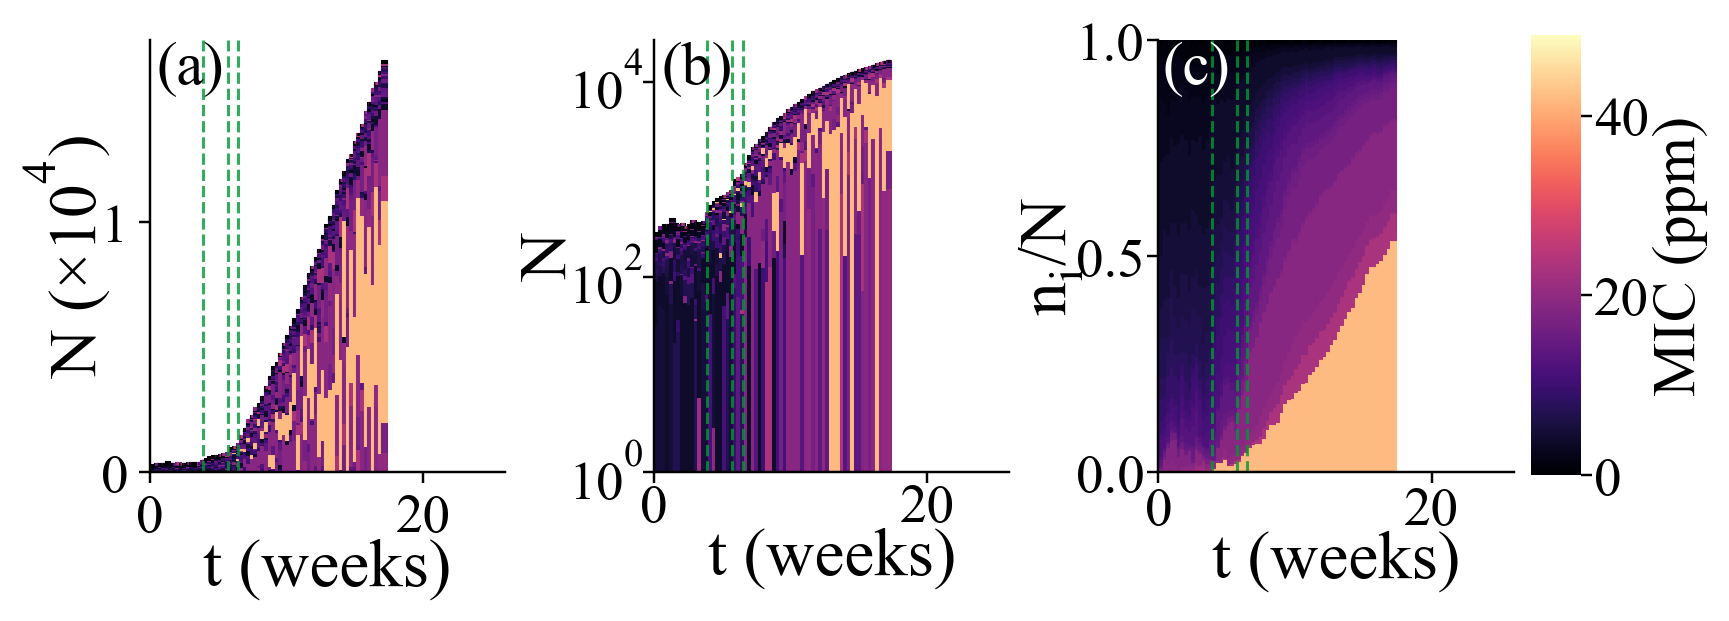

In [14]:
def plot1x3GridOfGenoDistbs_wrt_t(geno_data, N_max, geno_max):
    '''
    Plots a 1x3 grid of the different plots for a given genotype
    Do a regular N vs t, N vs t (log scale) and N normalised.
    '''
    
    fig, axes = plt.subplots(1, 3, dpi=220, sharex=True)
    plt.subplots_adjust(wspace=0.42)
    fig.set_size_inches(8,2.6)
    titleSize = 16
    labelSize = 13.8
    numbersize = 18
    legendsize = 10
    IDsize=12
    
    y_label_list = ["N ($\\times 10^4$)", "N", "n$_i$/N"]
    letters = list(string.ascii_lowercase)[:3]
    new_mh_times = getNewMicrohabTimes(geno_data)
    
    for ax, letter, y_label in zip(axes.flat[:2], letters, y_label_list):
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        #make a new dict where each key is the timestep, each entry is the dataframe values condensed into a single array (2D dataframe -> 1D array)
        collated_geno_dict = {}
        n_dict = {} #this will save the pop size N at time t (bit overengineered, this is kinda shoehorned in to plot vs N instead of t)

        for t in geno_data.keys():
            #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
            #round the genotypes to n decimal places
            processed_genos = np.around(geno_data[t].values[~np.isnan(geno_data[t].values)].flatten(), decimals=0)

            #dict containing the species genotypes (keys) and no. of ocurrences of each (values)
            geno_counts = Counter(processed_genos)
            n_bac = sum(geno_counts.values())
            #sort the geno counts so they're arranged in order of increasing resistance - REMOVED
            geno_counts = dict((geno_counts.items()))

            collated_geno_dict[t] = geno_counts
            n_dict[t] = n_bac


        colour_list = []
        t_last = 0
        t_list = list(collated_geno_dict.keys())
        t_list = [t/(24.*7.) for t in t_list] # rescale to weeks
        delta_t = (t_list[1] - t_list[0]) + 1./(24*7.)
        
        for t_scaled, t in zip(t_list, collated_geno_dict.keys()):
            bar_ypos = 0 #used to adjust the bottom of the bar chart so we can stack bacteria on top of one another
            for geno_val in collated_geno_dict[t].keys():
                percent_of_max_r = geno_val/geno_max #how resistant is this genotype compared to the most resistant one
                geno_colour2 = cm.magma(percent_of_max_r)

                bars = ax.bar(x = t_scaled, height=collated_geno_dict[t][geno_val], bottom=bar_ypos, color=geno_colour2, width=delta_t, label=geno_val, edgecolor=geno_colour2, linewidth=1)
                bar_ypos += collated_geno_dict[t][geno_val]

            t_last = float(t)
            n_last = float(n_dict[t])
        
        for nmh_t in new_mh_times[1:4]:
            ax.axvline(nmh_t, ls="--", c='#009933', lw=1., alpha=0.8)
        
        duration_weeks = duration/(24.*7) # rescale to weeks
        
        ax.set_xlim(0, duration_weeks)
        ax.text(0.02, 0.9, "("+letter+")", transform=ax.transAxes, fontsize=20)
        ax.set_xlabel("t (weeks)", fontsize=22, labelpad=-2)
        ax.set_ylabel(y_label, fontsize=22, labelpad=-4)
        ax.tick_params(axis='both', labelsize=numbersize)
        
        if letter == "a": ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        elif letter == "b": 
            ax.semilogy()
            ax.tick_params(axis='both', labelsize=numbersize, pad=0)
        
        ax.yaxis.get_offset_text().set_visible(False)
        
        
    # now do the normalised one
    for ax, letter, y_label in zip(axes.flat[2:], letters[2:], y_label_list[2:]):

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
                
        #make a new dict where each key is the timestep, each entry is the dataframe values condensed into a single array (2D dataframe -> 1D array)
        collated_geno_dict = {}
        n_dict = {} #this will save the pop size N at time t (bit overengineered, this is kinda shoehorned in to plot vs N instead of t)
        min_geno_val = 9e9
        max_geno_val = 0. #this will be updated to be the genotype of the most resistant bacteria in the system, used for scaling the colourmap
        for t in geno_data.keys():
            #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
            #round the genotypes to n decimal places
            processed_genos = np.around(geno_data[t].values[~np.isnan(geno_data[t].values)].flatten(), decimals=0)
            #dict containing the species genotypes (keys) and no. of ocurrences of each (values)
            geno_counts = Counter(processed_genos)
            n_bac = sum(geno_counts.values())
            #sort the geno counts so they're arranged in order of increasing resistance
            geno_counts = dict(sorted(geno_counts.items(), reverse=True))

            '''this for loop is the bit where the height normalisation happens'''
            for key in geno_counts:
                geno_counts[key] = geno_counts[key]/n_bac
            #divide the counts by the total no. of bacteria
            collated_geno_dict[t] = geno_counts
            n_dict[t] = n_bac


        colour_list = []
        t_last = 0
        n_old = 0 #used for getting the width of the bars
        t_list = list(collated_geno_dict.keys())
        t_list = [t/(24.*7.) for t in t_list] # rescale to weeks
        delta_t = (t_list[1] - t_list[0]) + 1./(24*7.)
        
        for t_scaled, t in zip(t_list, collated_geno_dict.keys()):
            bar_ypos = 0 #used to adjust the bottom of the bar chart so we can stack bacteria on top of one another
            for geno_val in collated_geno_dict[t].keys():
                #print(geno_val)
                percent_of_max_r = geno_val/geno_max #how resistant is this genotype compared to the most resistant one
                geno_colour2 = cm.magma(percent_of_max_r)

                # add the edgecolour to get rid of the pdf aliasing-type effects
                bars = ax.bar(x = t_scaled, height=collated_geno_dict[t][geno_val], bottom=bar_ypos, color=geno_colour2, width=delta_t, label=geno_val, edgecolor=geno_colour2, linewidth=1)
                bar_ypos += collated_geno_dict[t][geno_val]

            n_old = n_dict[t]
            t_last = float(t)
            n_last = float(n_dict[t])
            
            
        for nmh_t in new_mh_times[1:4]:
            ax.axvline(nmh_t, ls="--", c='#009933', lw=1., alpha=0.8)
            
        ax.set_ylim(0, 1.)
        ax.set_ylabel(y_label, fontsize=22, labelpad=-3)
        ax.set_xlabel("t (weeks)", fontsize=22, labelpad=-2)
        ax.set_yticks([0., 0.5, 1.0])
        ax.set_xlim(0, duration/(24.*7))
        ax.text(0.01, 0.9, "("+letter+")", transform=ax.transAxes, fontsize=20, color='white')
        ax.tick_params(axis='both', labelsize=numbersize, pad=1)
        
        
    cmap = plt.get_cmap('magma') # make sure this matches the one used above
    cbar_ax = fig.add_axes([0.91, 0.12, 0.028, 0.77])
    cbar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=geno_max), cmap=cmap), cax=cbar_ax)
    cbar.set_label(f'MIC (ppm)', fontsize=20, labelpad=1)
    cbar.ax.tick_params(labelsize=numbersize, pad=1)
    cbar.outline.set_visible(False)
        


#     plt.savefig('geno_distb_plots/1x3_plot_showcase_vs_t.pdf', bbox_inches="tight", dpi=330)
    plt.savefig('ms_paper_plots/1x3_plot_showcase_vs_t_low_migration.pdf', bbox_inches="tight", dpi=330)
    plt.show()
    
    
#plot1x3GridOfGenoDistbs_wrt_t(pcres_14_run_b, N_max=n_max_2x2, geno_max=geno_max_2x2)
plot1x3GridOfGenoDistbs_wrt_t(pcres_16_run_d_low_r_mig, N_max=n_max_2x3_16pc_low_r_mig, geno_max=geno_max_2x3_16pc_low_r_mig)

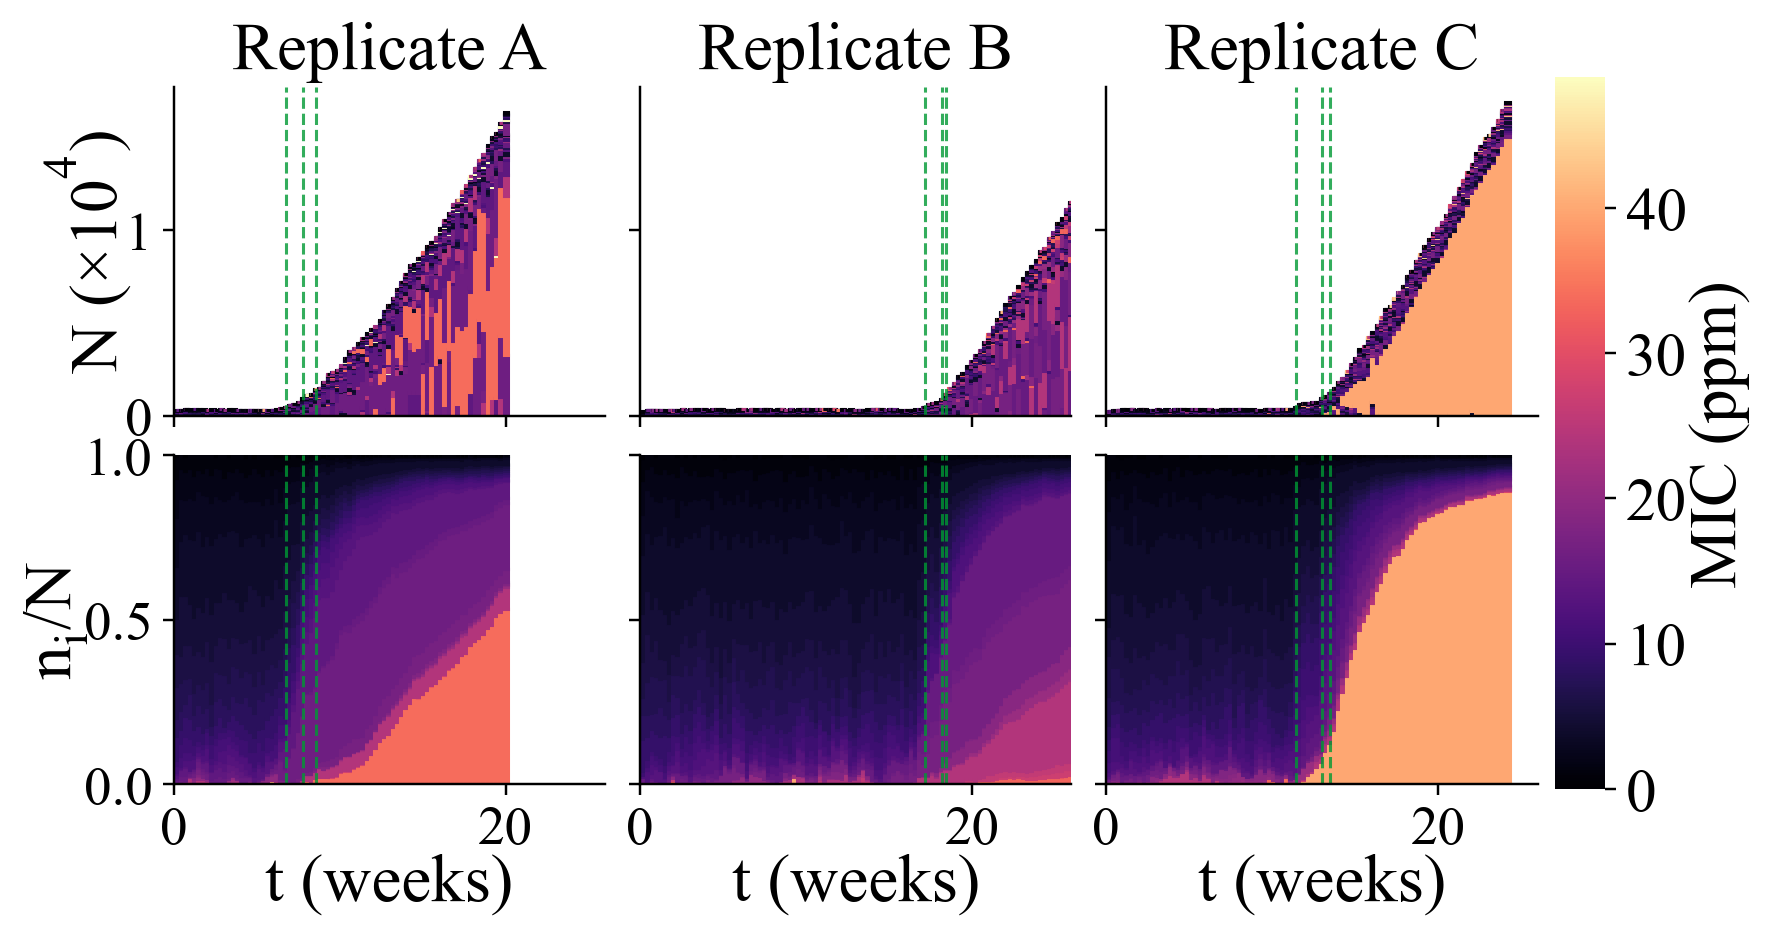

In [15]:
def plot2x3GridOfGenoDistbs_wrt_t(geno_data_list, N_max, geno_max, log_scale=False):
    '''
    Plots a 2x3 grid of the remaining plots from the original 2x2 plots
    
    (a-c) do regular geno distbs (probably log scale)
    (d-f) corresponding normalised population fraction ones.
    
    '''
    
    fig, axes = plt.subplots(2, 3, dpi=220, sharex=True, sharey="row")
    plt.subplots_adjust(wspace=0.08, hspace=0.12)
    fig.set_size_inches(8,4.2)
    titleSize = 16
    labelSize = 13.8
    numbersize = 18
    legendsize = 10
    IDsize=12
    
    #y_label_list = ["N ($\\times 10^4$)", "N", "n$_i$/N"]
    if log_scale:
        y_label_list = ["N"]*3 + ["n$_i$/N"]*3
    else:
        y_label_list = ["N $(\\times 10^4)$"]*3 + ["n$_i$/N"]*3
    letters = list(string.ascii_lowercase)[:6]
    
    
    for ax, geno_data, letter, y_label in zip(axes.flat[:3], geno_data_list, letters, y_label_list):
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        #make a new dict where each key is the timestep, each entry is the dataframe values condensed into a single array (2D dataframe -> 1D array)
        collated_geno_dict = {}
        n_dict = {} #this will save the pop size N at time t (bit overengineered, this is kinda shoehorned in to plot vs N instead of t)
        new_mh_times = getNewMicrohabTimes(geno_data)

        for t in geno_data.keys():
            #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
            #round the genotypes to n decimal places
            processed_genos = np.around(geno_data[t].values[~np.isnan(geno_data[t].values)].flatten(), decimals=0)

            #dict containing the species genotypes (keys) and no. of ocurrences of each (values)
            geno_counts = Counter(processed_genos)
            n_bac = sum(geno_counts.values())
            #sort the geno counts so they're arranged in order of increasing resistance
            geno_counts = dict((geno_counts.items()))

            collated_geno_dict[t] = geno_counts
            n_dict[t] = n_bac


        colour_list = []
        t_last = 0
        t_list = list(collated_geno_dict.keys())
        t_list = [t/(24.*7.) for t in t_list] # rescale to weeks
        delta_t = (t_list[1] - t_list[0]) + 1./(24*7.)
        
        for t_scaled, t in zip(t_list, collated_geno_dict.keys()):
            bar_ypos = 0 #used to adjust the bottom of the bar chart so we can stack bacteria on top of one another
            for geno_val in collated_geno_dict[t].keys():
                percent_of_max_r = geno_val/geno_max #how resistant is this genotype compared to the most resistant one
                geno_colour2 = cm.magma(percent_of_max_r)

                bars = ax.bar(x = t_scaled, height=collated_geno_dict[t][geno_val], bottom=bar_ypos, color=geno_colour2, width=delta_t, label=geno_val, edgecolor=geno_colour2, linewidth=1)
                bar_ypos += collated_geno_dict[t][geno_val]

            t_last = float(t)
            n_last = float(n_dict[t])
        
        # add horizontal lines at times new microhabitats are added
        for nmh_t in new_mh_times[1:4]:
            ax.axvline(nmh_t, ls="--", c='#009933', lw=1., alpha=0.8)
        
        duration_weeks = duration/(24.*7) # rescale to weeks
        
        ax.set_xlim(0, duration_weeks)
        #ax.text(0.02, 0.9, "("+letter+")", transform=ax.transAxes, fontsize=20)
        ax.set_xlabel("t (weeks)", fontsize=22, labelpad=-1)
        ax.set_ylabel(y_label, fontsize=22, labelpad=-3)
        ax.set_title('Replicate '+letter.upper(), fontsize=22)
        ax.tick_params(axis='both', labelsize=numbersize)
        
        
        
        if log_scale:
            ax.semilogy()
        else:
            ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        
        ax.yaxis.get_offset_text().set_visible(False)
#         ax.axhline(0.75*550, ls="-", c='b', lw=2, alpha=0.5)
#         ax.axhline(2*0.75*550, ls="-", c='b', lw=2, alpha=0.5)
        
        ax.label_outer()
        
    # now do the normalised one
    for ax, geno_data, letter, y_label in zip(axes.flat[3:], geno_data_list, letters[3:], y_label_list[3:]):

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
                
        #make a new dict where each key is the timestep, each entry is the dataframe values condensed into a single array (2D dataframe -> 1D array)
        collated_geno_dict = {}
        n_dict = {} #this will save the pop size N at time t (bit overengineered, this is kinda shoehorned in to plot vs N instead of t)
        min_geno_val = 9e9
        max_geno_val = 0. #this will be updated to be the genotype of the most resistant bacteria in the system, used for scaling the colourmap
        new_mh_times = getNewMicrohabTimes(geno_data)
        
        for t in geno_data.keys():
            #gets all the genotypes from the dataframe, removes NaNs and converts to 1D numpy array
            #round the genotypes to n decimal places
            processed_genos = np.around(geno_data[t].values[~np.isnan(geno_data[t].values)].flatten(), decimals=0)
            #dict containing the species genotypes (keys) and no. of ocurrences of each (values)
            geno_counts = Counter(processed_genos)
            n_bac = sum(geno_counts.values())
            #sort the geno counts so they're arranged in order of increasing resistance
            geno_counts = dict(sorted(geno_counts.items(), reverse=True))

            '''this for loop is the bit where the height normalisation happens'''
            for key in geno_counts:
                geno_counts[key] = geno_counts[key]/n_bac
            #divide the counts by the total no. of bacteria
            collated_geno_dict[t] = geno_counts
            n_dict[t] = n_bac


        colour_list = []
        t_last = 0
        n_old = 0 #used for getting the width of the bars
        t_list = list(collated_geno_dict.keys())
        t_list = [t/(24.*7.) for t in t_list] # rescale to weeks
        delta_t = (t_list[1] - t_list[0]) + 1./(24*7.)
        
        for t_scaled, t in zip(t_list, collated_geno_dict.keys()):
            bar_ypos = 0 #used to adjust the bottom of the bar chart so we can stack bacteria on top of one another
            for geno_val in collated_geno_dict[t].keys():
                #print(geno_val)
                percent_of_max_r = geno_val/geno_max #how resistant is this genotype compared to the most resistant one
                geno_colour2 = cm.magma(percent_of_max_r)

                # add the edgecolour to get rid of the pdf aliasing-type effects
                bars = ax.bar(x = t_scaled, height=collated_geno_dict[t][geno_val], bottom=bar_ypos, color=geno_colour2, width=delta_t, label=geno_val, edgecolor=geno_colour2, linewidth=1)
                bar_ypos += collated_geno_dict[t][geno_val]

            n_old = n_dict[t]
            t_last = float(t)
            n_last = float(n_dict[t])
            
            
        for nmh_t in new_mh_times[1:4]:
            ax.axvline(nmh_t, ls="--", c='#009933', lw=1., alpha=0.8)
            
        ax.set_ylim(0, 1.)
        ax.set_ylabel(y_label, fontsize=22, labelpad=-2)
        ax.set_xlabel("t (weeks)", fontsize=22, labelpad=-1)
        ax.set_yticks([0., 0.5, 1.0])
        ax.set_xlim(0, duration/(24.*7))
        #ax.text(0.01, 0.85, "("+letter+")", transform=ax.transAxes, fontsize=20, color='white')
        ax.tick_params(axis='both', labelsize=numbersize)
        ax.label_outer()
        
        
    cmap = plt.get_cmap('magma') # make sure this matches the one used above
    cbar_ax = fig.add_axes([0.91, 0.12, 0.028, 0.77])
    cbar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=geno_max), cmap=cmap), cax=cbar_ax)
    cbar.set_label(f'MIC (ppm)', fontsize=22, labelpad=1)
    cbar.ax.tick_params(labelsize=20)
    cbar.outline.set_visible(False)
        


#     plt.savefig('geno_distb_plots/1x3_plot_showcase_vs_t.pdf', bbox_inches="tight", dpi=330)
    plt.savefig('ms_paper_plots/2x3_plot_showcase_vs_t_low_migration.pdf', bbox_inches="tight", dpi=330)
    plt.show()
    
    
#plot2x3GridOfGenoDistbs_wrt_t(geno_2x3_plot_data, N_max=n_max_2x2, geno_max=geno_max_2x2)
plot2x3GridOfGenoDistbs_wrt_t(geno_2x3_plot_data_low_r_mig,     N_max=n_max_2x3_16pc_low_r_mig, geno_max=geno_max_2x3_16pc_low_r_mig, log_scale=False)

In [16]:
#plot2x3GridOfGenoDistbs_wrt_t(geno_2x3_plot_data_regular_r_mig, N_max=n_max_2x3_16pc,           geno_max=geno_max_2x3_16pc)


In [17]:
def get_avg_plateau_time(event_counters, pc_res, suffix=""):
    '''
    this is used to calculate the avg time it takes for the system to go from 1st microhab biofilm to 2nd microhab
    '''
    
    growth_runs = list(event_counters[event_counters["bf_thickness"] > 0].sort_values(by=["n_replications"], ascending=False)['runID'].values)
    
    times_between_biofilm = []
    
    for runID in growth_runs:
        geno_dict = getGenoDistbDict(runID, pc_res=pc_res, phase_val=phase2_str, event_counters=event_counters, suffix=suffix)
        
        new_mh_times = getNewMicrohabTimes(geno_dict)
        
        if len(new_mh_times) >= 3:
            new_mh_diff = new_mh_times[2] - new_mh_times[1]
        
            times_between_biofilm.append(new_mh_diff)
        
    
    times_between_bf_array = np.array(times_between_biofilm)
    mh_diff_mean = np.mean(times_between_bf_array)
    mh_diff_stDev = np.std(times_between_bf_array)
    mh_diff_std_err = mh_diff_stDev/np.sqrt(times_between_bf_array.size)
    
    print(f"time between microhabs: {mh_diff_mean:.2f} +/- {mh_diff_std_err:.2f}, \tstdDev: {mh_diff_stDev:.2f}")

In [18]:
get_avg_plateau_time(all_event_counters_16pc, 16, suffix="")

time between microhabs: 2.65 +/- 0.20, 	stdDev: 1.17


In [19]:
#get_avg_plateau_time(all_event_counters_16pc_low_r_mig, 16, suffix="-migration_rate-0.1")

In [20]:
#get_avg_plateau_time(all_event_counters_14pc, 14)

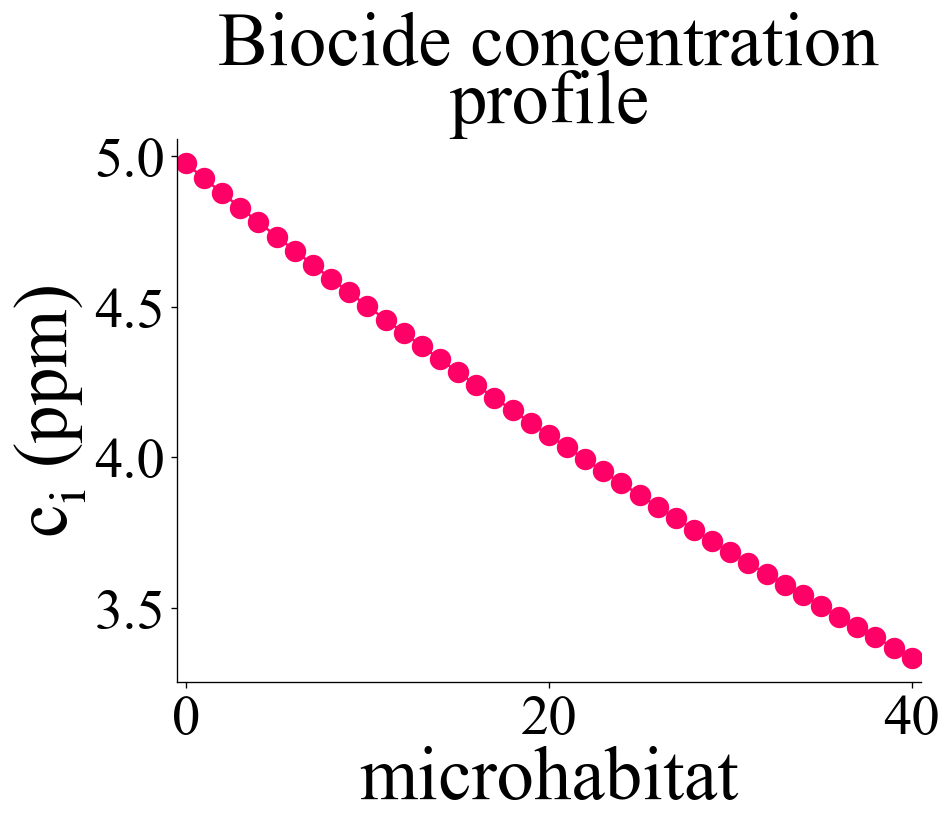

In [21]:
# plot the exponential gradient vs microhabitat for model diagram
fontsize=45
labelsize=34


fig, ax = plt.subplots(dpi=120)
fig.set_size_inches(8,6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
alpha = 0.01
c_max = 5

x = np.arange(0, 42, 1)
x_cont = np.linspace(0, 41, 1000)

def calc_exp(x, c_max, alpha):
    x_avg = (x[:-1] + x[1:])/2.
    return c_max*np.exp(-alpha*x_avg)

c_grad = calc_exp(x, c_max=c_max, alpha=alpha)
c_grad_cont = calc_exp(x_cont, c_max=c_max, alpha=alpha)

ax.scatter(x[:-1], c_grad, s=140, c='#ff0066')
ax.plot(x[:-1], c_grad, c='#ff0066')

ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlim(-0.5, 40.5)

ax.set_title("Biocide concentration\nprofile", fontsize=fontsize, linespacing=0.8)
ax.set_ylabel("c$_i$ (ppm)", fontsize=fontsize)
ax.set_xlabel("microhabitat", fontsize=fontsize, labelpad=0)
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.savefig("geno_distb_plots/c_gradient.pdf", bbox_inches='tight', dpi=330)

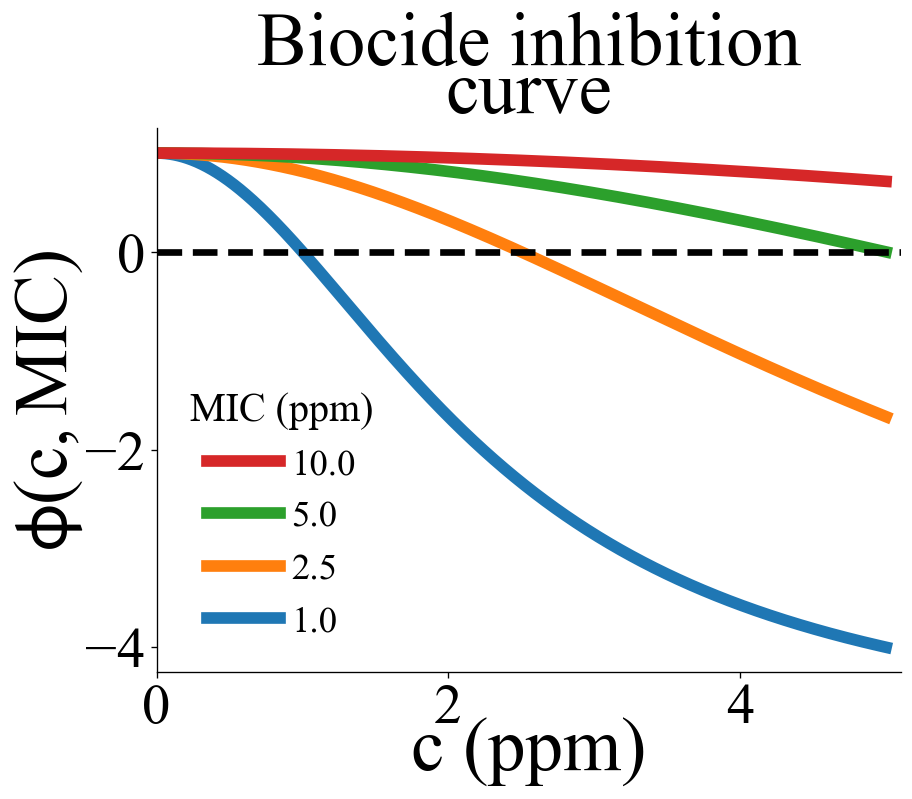

In [24]:
# plot some growth curves vs c for several beta values
fig, ax = plt.subplots(dpi=120)
fig.set_size_inches(8,6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def growth_curve(c, beta):
    cB = c/beta
    return 1. - (6.*cB**2)/(5.+cB**2)

c = np.linspace(0, 5, 1000)

beta_vals = [1., 2.5, 5., 10.]

for b in beta_vals:
    ax.plot(c, growth_curve(c, b), label=f'{b:.1f}', lw=7)


ax.set_title('Biocide inhibition\ncurve', fontsize=fontsize, linespacing=0.6)
ax.set_xlabel("c (ppm)", fontsize=45, labelpad=-10)
ax.set_ylabel("$\\phi(c, MIC)$", fontsize=45, labelpad=0)
ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlim(-0., 5.1)
ax.axhline(0, c='k', ls='--', lw=4)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize=22, handletextpad=0.3, frameon=False, title='MIC (ppm)', title_fontsize=24)
plt.savefig("geno_distb_plots/growth_curves.pdf", bbox_inches='tight', dpi=330)
plt.show()